# Deskripsi Kasus

Data yang digunakan merupakan kumpulan data yang mencakup 3 skor atau nilai tes siswa di sekolah umum serta berbagai faktor pribadi dan sosial-ekonomi yang mungkin memiliki efek interaksi pada mereka. Data tersebut digunakan untuk mengetahui faktor apa yang mempengaruhi nilai tes siswa di sekolah, yakni sebagai berikut:

1. Gender: jenis kelamin siswa (laki-laki/perempuan)

2. Ethnic Group: kelompok etnis siswa (kelompok A - E)

3. Parent Education: latar belakang pendidikan orang tua siswa (dari some_highschool sampai master's degree)

4. Lunch type: jenis makan siang siswa (standar/kurang)

5. Test preparation: kursus persiapan tes yang diikuti siswa (selesai/ tidak sama sekali)

6. Parent marital status: status perkawinan orang tua (menikah/lajang/janda/bercerai)

7. Practice sport: seberapa sering siswa latihan olahraga (tidak pernah/kadang/teratur)

8. Is first child: apakah merupakan anak pertama dalam keluarga (ya/tidak)

9. Nr siblings: jumlah saudara kandung yang dimiliki siswa (0-7)

10. Transport means: sarana transportasi ke sekolah (bus sekolah/pribadi)

11. Weekly study hours: jam belajar mandiri mingguan siswa (kurang dri 5 jam/ 5-10/ lebih dari 10 jam)

12. Math score: nilai tes matematika (0-100)

13. Reading score: nilai tes membaca (0-100)

14. Writing score: nilai tes menulis (0-100)

In [2]:
import pandas as pd
data = pd.read_csv(r'D:\mata kuliah\analisis data eksploratif\Expanded_data_with_more_features.csv', sep= ",")
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
# Untuk memeriksa struktur dan tipe data dari dataset yang dimiliki
print(data.dtypes)

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


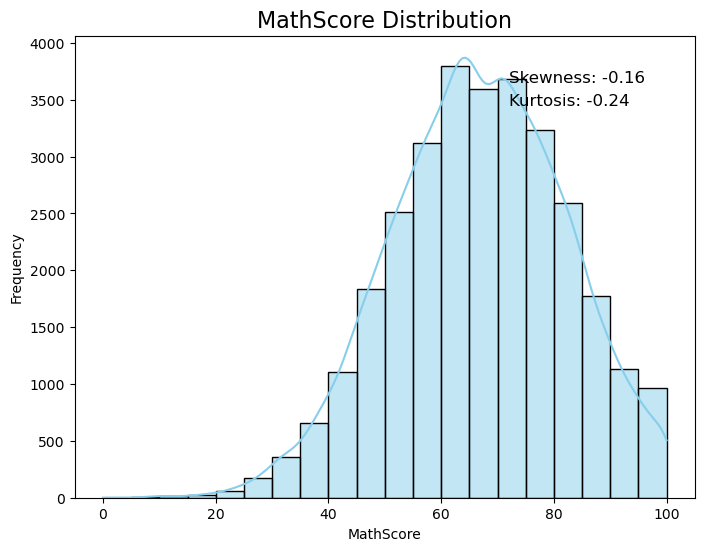

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Function to plot the histogram, KDE, and annotate skewness and kurtosis
def plot_distribution(data, column_name, color):
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with KDE
    sns.histplot(data[column_name], bins=20, kde=True, color=color)
    
    # Calculate skewness and kurtosis
    skewness = skew(data[column_name].dropna())
    kurt = kurtosis(data[column_name].dropna())
    
    # Annotate the plot with skewness and kurtosis
    plt.title(f'{column_name} Distribution', fontsize=16)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Kurtosis: {kurt:.2f}', fontsize=12, transform=plt.gca().transAxes)
    
    # Show plot
    plt.show()

# Plot for MathScore
plot_distribution(data, 'MathScore', 'skyblue')

Dari visualisasi dan informasi skewness serta kurtosis, kita bisa menyimpulkan bahwa distribusi MathScore mendekati distribusi normal. Distribusi ini tidak uniform, karena tidak ada pemerataan nilai di semua rentang. Ini juga bukan eksponensial, yang biasanya memiliki penurunan tajam pada salah satu sisinya, dan bukan binomial, karena data bersifat kontinu dan bukan diskret.

Distribusi MathScore cenderung mendekati normal, meskipun mungkin sedikit miring ke kiri (negatively skewed), yang dapat diabaikan jika nilai skewness mendekati nol.

C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


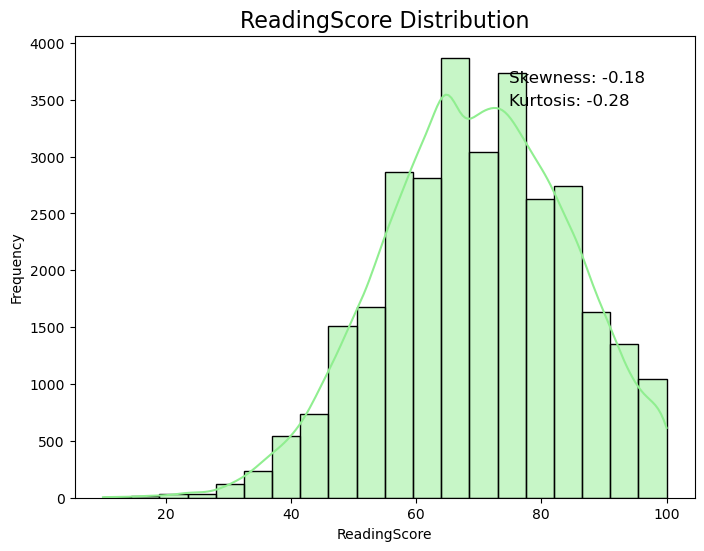

In [12]:
# Function to plot the histogram, KDE, and annotate skewness and kurtosis
def plot_distribution(data, column_name, color):
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with KDE
    sns.histplot(data[column_name], bins=20, kde=True, color=color)
    
    # Calculate skewness and kurtosis
    skewness = skew(data[column_name].dropna())
    kurt = kurtosis(data[column_name].dropna())
    
    # Annotate the plot with skewness and kurtosis
    plt.title(f'{column_name} Distribution', fontsize=16)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Kurtosis: {kurt:.2f}', fontsize=12, transform=plt.gca().transAxes)
    
    # Show plot
    plt.show()
    
# Plot for ReadingScore
plot_distribution(data, 'ReadingScore', 'lightgreen')

ReadingScore kemungkinan besar mendekati distribusi normal karena plot KDE yang terlihat simetris atau hampir simetris di sekitar nilai rata-rata.
Ini bukan distribusi uniform, karena distribusi nilai tidak tersebar merata di semua rentang.
Bukan distribusi eksponensial, yang biasanya memiliki penurunan tajam setelah puncak.
Bukan distribusi binomial, karena ini adalah data kontinu, bukan data diskret dengan dua hasil.
Distribusi ReadingScore cenderung normal atau mendekati normal, meskipun mungkin ada sedikit kemiringan (bergantung pada hasil spesifik skewness yang muncul di plot).

C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


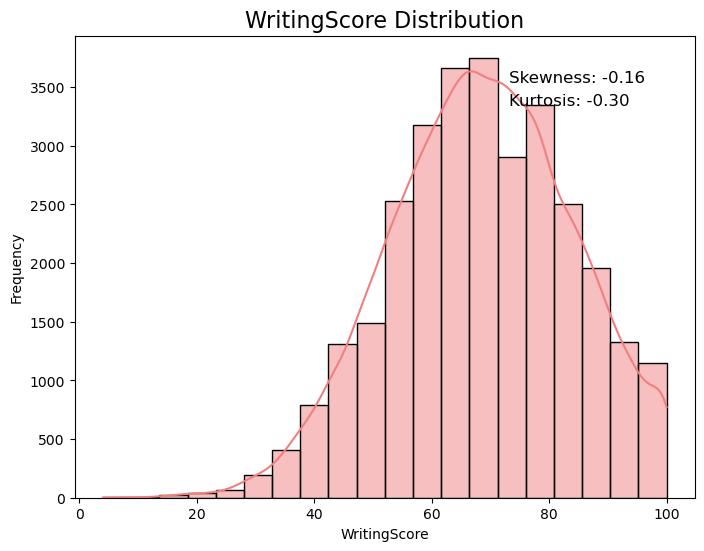

In [14]:
# Function to plot the histogram, KDE, and annotate skewness and kurtosis
def plot_distribution(data, column_name, color):
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with KDE
    sns.histplot(data[column_name], bins=20, kde=True, color=color)
    
    # Calculate skewness and kurtosis
    skewness = skew(data[column_name].dropna())
    kurt = kurtosis(data[column_name].dropna())
    
    # Annotate the plot with skewness and kurtosis
    plt.title(f'{column_name} Distribution', fontsize=16)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Kurtosis: {kurt:.2f}', fontsize=12, transform=plt.gca().transAxes)
    
    # Show plot
    plt.show()
    
# Plot for ReadingScore
plot_distribution(data, 'WritingScore', 'lightcoral')

Berdasarkan plot WritingScore, kemungkinan besar distribusinya mendekati normal karena bentuk KDE terlihat simetris atau hampir simetris di sekitar rata-rata.
Ini bukan distribusi uniform, karena nilai tidak tersebar merata di seluruh rentang data.
Ini juga bukan eksponensial, karena distribusi eksponensial biasanya memiliki ekor yang panjang di satu sisi dan penurunan tajam.
Bukan distribusi binomial, karena ini adalah data kontinu dan bukan data diskret dengan dua hasil.
Distribusi WritingScore cenderung normal atau mendekati normal, yang didukung oleh visualisasi yang menunjukkan bentuk lonceng simetris, serta skewness dan kurtosis yang mendekati nilai-nilai normal.

Berdasarkan hasil visualisasi dan analisis skewness dan kurtosis, distribusi untuk MathScore, ReadingScore, dan WritingScore dapat dikategorikan sebagai distribusi **mendekati normal**, namun dengan sedikit kemiringan ke kiri dan distribusi yang lebih datar (platykurtic). Meskipun bukan distribusi normal yang sempurna, mereka lebih mendekati distribusi normal dibandingkan jenis distribusi lain.

### Penjelasan mengapa termasuk mendekati normal:
1. **Normal Distribution**: Ditandai dengan kurva lonceng yang simetris, sebagian besar nilai terkonsentrasi di sekitar mean, dengan jumlah nilai yang semakin sedikit ketika menjauh dari mean.
   - Pada data ini, meskipun ada sedikit kemiringan ke kiri, sebagian besar data berada di sekitar nilai tengah.
   - Kurtosis yang rendah menunjukkan bahwa distribusi lebih datar, tetapi tetap mempertahankan pola seperti distribusi normal.
  
2. **Tidak termasuk Uniform**: Distribusi seragam (uniform) adalah ketika setiap nilai memiliki probabilitas yang hampir sama. Di sini, nilai-nilai lebih terkonsentrasi di sekitar rata-rata, bukan tersebar secara seragam.
   
3. **Tidak termasuk Eksponensial**: Distribusi eksponensial ditandai dengan penurunan cepat dari nilai puncak, yang tidak terlihat di data ini. Distribusi eksponensial biasanya muncul dalam konteks waktu atau jarak antar peristiwa, sedangkan data skor ujian ini tidak menunjukkan pola tersebut.

4. **Tidak termasuk Binomial**: Distribusi binomial terkait dengan hasil dari percobaan biner (sukses/gagal). Data ini merupakan hasil tes akademik dengan skala kontinu (0-100), jadi distribusi binomial tidak relevan.

Jadi, meskipun tidak sepenuhnya simetris, data **MathScore**, **ReadingScore**, dan **WritingScore** termasuk dalam **distribusi mendekati normal**.

C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


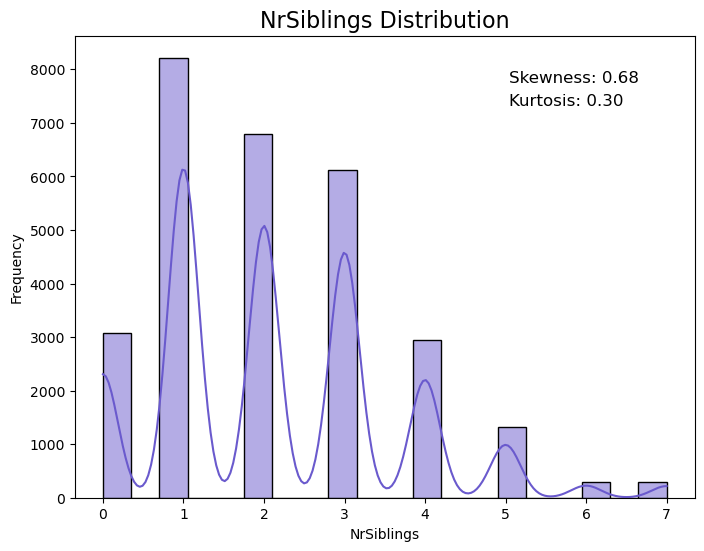

C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: unsupported operand type(s) for /: 'str' and 'int'

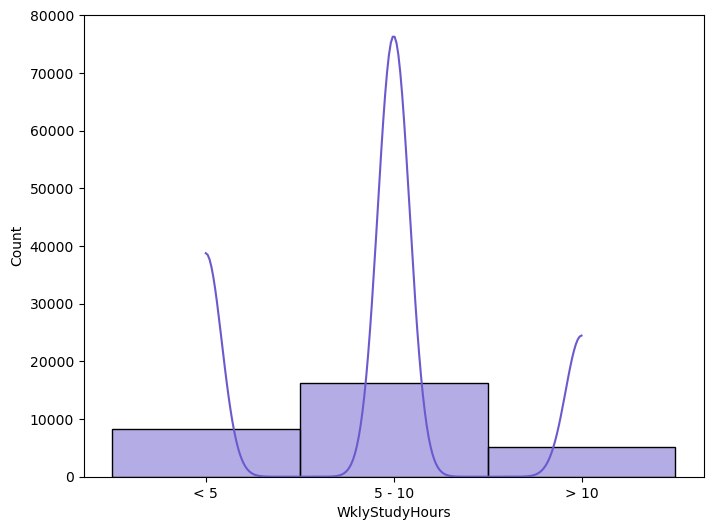

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Function to plot the histogram, KDE, and annotate skewness and kurtosis
def plot_distribution(data, column_name, color):
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with KDE
    sns.histplot(data[column_name], bins=20, kde=True, color=color)
    
    # Calculate skewness and kurtosis
    skewness = skew(data[column_name].dropna())
    kurt = kurtosis(data[column_name].dropna())
    
    # Annotate the plot with skewness and kurtosis
    plt.title(f'{column_name} Distribution', fontsize=16)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Kurtosis: {kurt:.2f}', fontsize=12, transform=plt.gca().transAxes)
    
    # Show plot
    plt.show()

# Plot for NrSiblings
plot_distribution(data, 'NrSiblings', 'slateblue')

# Plot for Weekly Study Hours
plot_distribution(data, 'WklyStudyHours', 'slateblue')

Berdasarkan visualisasi data variabel **NrSiblings** dan **WklyStudyHours** di atas, didapatkan berikut:

### 1. **NrSiblings** (Jumlah Saudara Kandung)
- **Kategori Distribusi**: **Binomial (Discrete)**.
  - **Alasan**: Data jumlah saudara kandung merupakan variabel diskret yang biasanya terdistribusi secara **skewed** (miring). Distribusi binomial cocok untuk variabel diskret, di mana setiap siswa memiliki jumlah saudara kandung tertentu (misalnya 0, 1, 2, ...). Meskipun tidak selalu berperilaku seperti distribusi binomial klasik, data diskret seperti ini lebih baik dikategorikan sebagai distribusi binomial daripada distribusi kontinu seperti normal atau eksponensial.

### 2. **WklyStudyHours** (Jam Belajar Mingguan)
- **Kategori Distribusi**: **(Bukan Uniform, Normal, Eksponensial, atau Binomial)**.
  - **Alasan**: Data ini bukan data kontinu tetapi merupakan variabel kategori yang terdiri dari interval-interval seperti "<5 jam", "5-10 jam", dan ">10 jam". Oleh karena itu, distribusinya tidak dapat dikategorikan sebagai normal, eksponensial, atau binomial. Ini adalah **distribusi kategori** yang menggambarkan bagaimana siswa dikelompokkan ke dalam berbagai kategori jam belajar mingguan. Setiap kategori memiliki jumlah siswa yang berbeda, dan ini lebih tepat dipandang sebagai distribusi kategori.

### Kesimpulan:
- **NrSiblings** termasuk dalam distribusi **binomial**, karena jumlah saudara kandung merupakan variabel diskret dengan hasil yang terbatas (0, 1, 2, ...).
- **WklyStudyHours** termasuk dalam **distribusi kategori**, yang tidak masuk dalam kategori distribusi kontinu seperti normal atau eksponensial, juga bukan binomial karena data ini dikelompokkan berdasarkan interval waktu belajar.

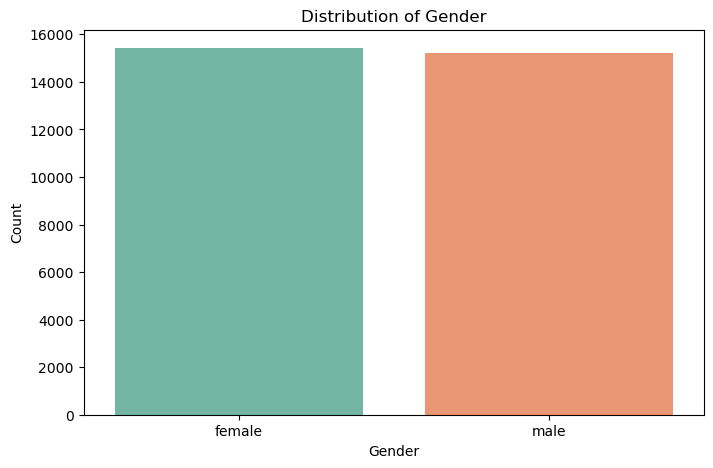

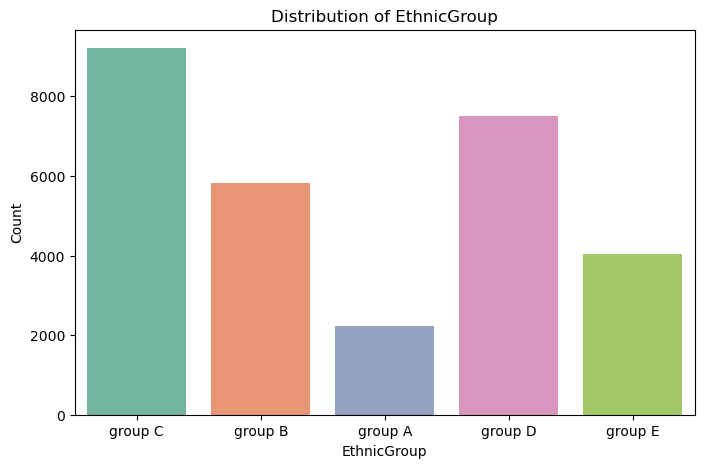

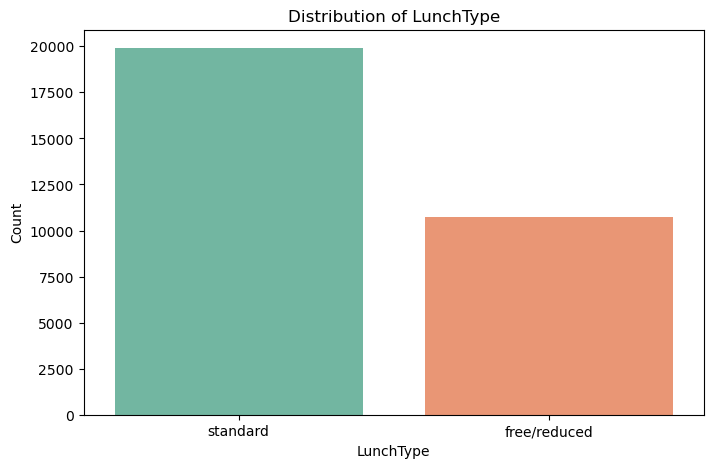

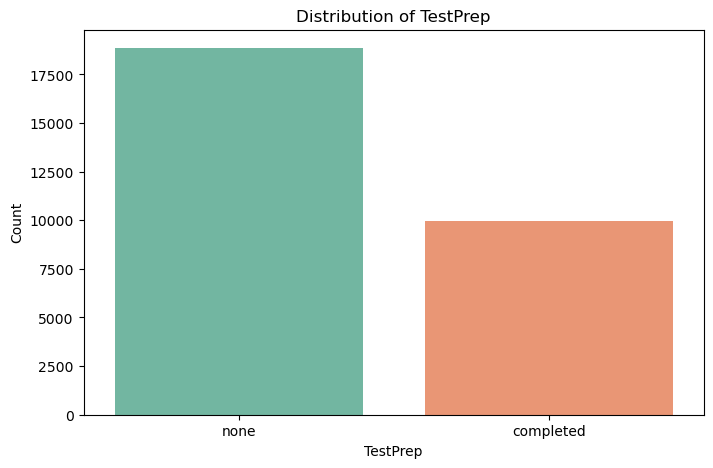

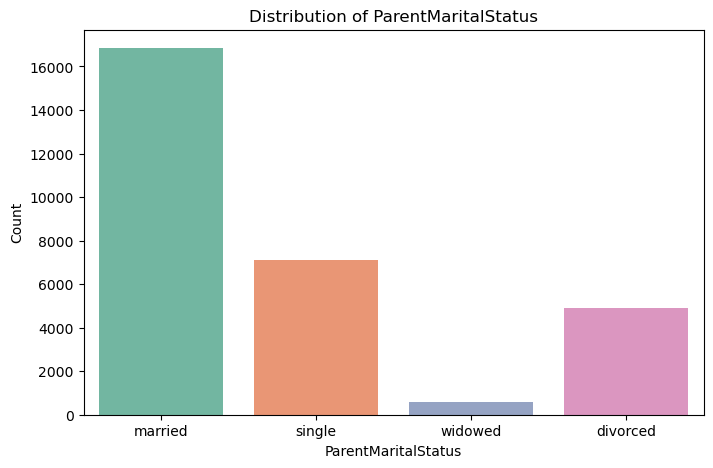

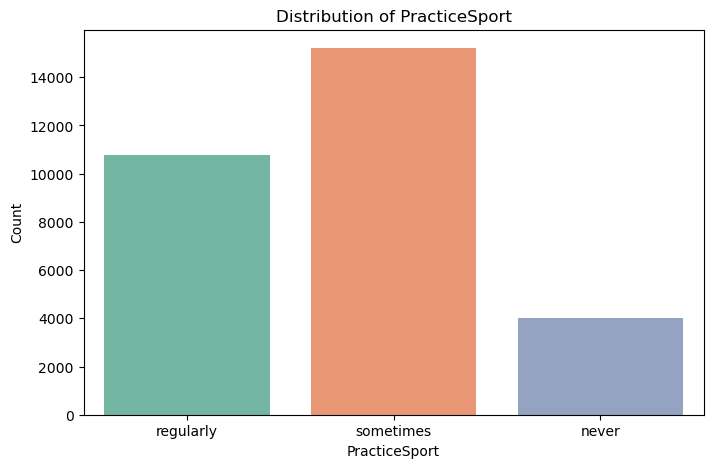

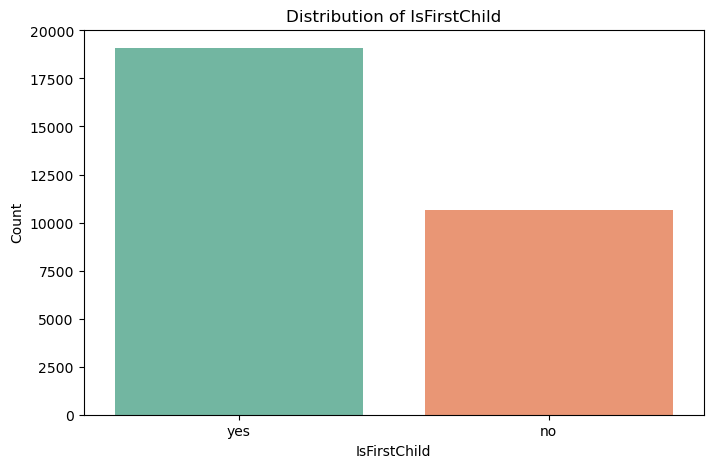

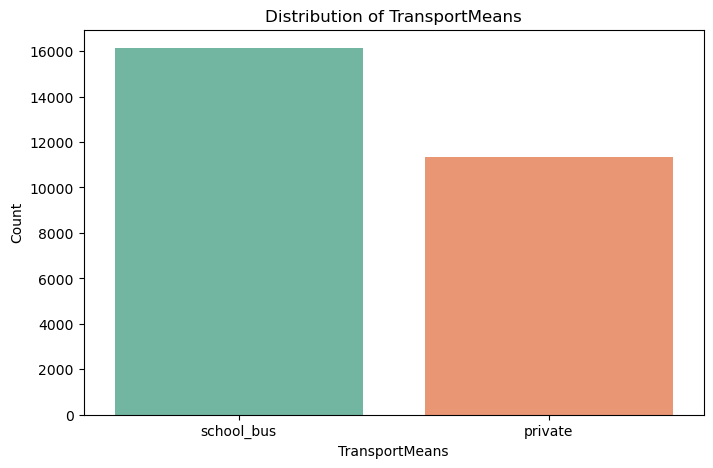

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Gender', 'EthnicGroup', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    if col == 'Occupation':
        sns.countplot(y=data[col], palette='Set2')  # Tukar X dan Y
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Count')
    else:
        sns.countplot(x=data[col], palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.show()

Pada variabel Gender, Ethnic Group, Lunch Type, Test Preparation, Parent Marital Status, Practice Sport, Transport Means menggunakan Categorical distribution. Karena variabel-variabel ini bersifat kategorikal, yang berarti mereka dapat mengambil nilai tertentu tanpa urutan numerik. Misalnya, Gender memiliki dua kategori (Male/Female), Ethnic Group memiliki beberapa kategori (A - E), dan Lunch Type dalam beberapa kategori (Standar/ kurang).

In [17]:
# Untuk melakukan pemusatan dan penyebaran data
import pandas as pd
from scipy.stats import skew

# Fungsi untuk menghitung pemusatan dan penyebaran data
def central_tendency_and_dispersion(data, column_name):
    mean_val = data[column_name].mean()
    median_val = data[column_name].median()
    variance_val = data[column_name].var()
    std_dev = data[column_name].std()
    skewness_val = skew(data[column_name].dropna())
    
    print(f"Analisis Pemusatan dan Penyebaran untuk {column_name}:")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Variance: {variance_val:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Skewness: {skewness_val:.2f}")
    print("-" * 50)

# Daftar variabel yang akan dianalisis
variables = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']

# Lakukan analisis pemusatan, penyebaran, dan skewness untuk tiap variabel
for var in variables:
    central_tendency_and_dispersion(data, var)

Analisis Pemusatan dan Penyebaran untuk MathScore:
Mean: 66.56
Median: 67.00
Variance: 235.98
Standard Deviation: 15.36
Skewness: -0.16
--------------------------------------------------
Analisis Pemusatan dan Penyebaran untuk ReadingScore:
Mean: 69.38
Median: 70.00
Variance: 217.83
Standard Deviation: 14.76
Skewness: -0.18
--------------------------------------------------
Analisis Pemusatan dan Penyebaran untuk WritingScore:
Mean: 68.42
Median: 69.00
Variance: 238.50
Standard Deviation: 15.44
Skewness: -0.16
--------------------------------------------------
Analisis Pemusatan dan Penyebaran untuk NrSiblings:
Mean: 2.15
Median: 2.00
Variance: 2.13
Standard Deviation: 1.46
Skewness: 0.68
--------------------------------------------------


C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


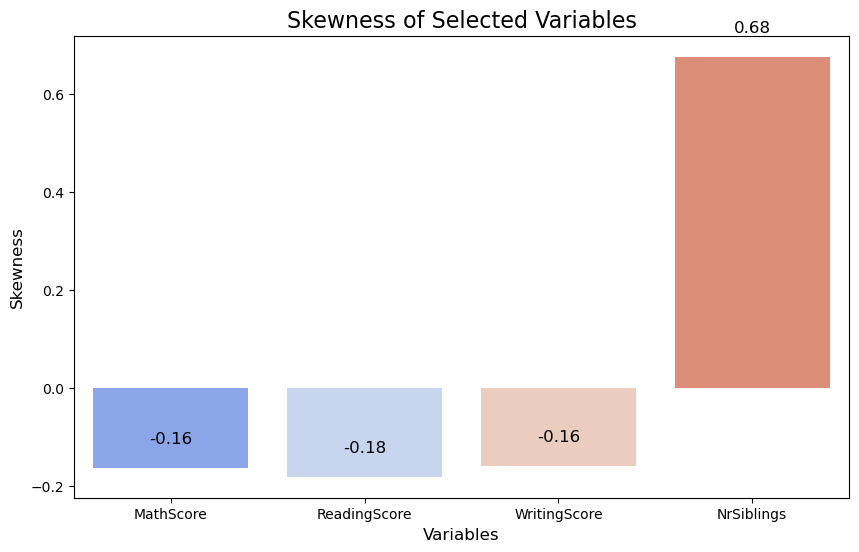

In [18]:
# analisis skewness
import matplotlib.pyplot as plt
import seaborn as sns

# List variabel yang akan dianalisis
variables = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']

# Hitung skewness untuk setiap variabel
skewness_values = [skew(data[var].dropna()) for var in variables]

# Membuat bar chart untuk visualisasi skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=variables, y=skewness_values, palette='coolwarm')

# Menambahkan judul dan label pada plot
plt.title('Skewness of Selected Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Skewness', fontsize=12)

# Menampilkan nilai skewness di atas setiap bar
for i, value in enumerate(skewness_values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=12)

plt.show()

Nilai skewness positif menunjukkan bahwa distribusi memiliki lebih banyak data di sisi kiri dengan ekor panjang di sisi kanan, yang dikenal sebagai positively skewed.
Nilai skewness negatif menunjukkan sebaliknya, bahwa distribusi memiliki lebih banyak data di sisi kanan dan ekor panjang di sisi kiri, atau disebut negatively skewed.
Semakin besar nilai skewness (baik positif atau negatif), semakin jauh distribusi dari simetris atau normal.